# Counting inversions

In this noteobok, we are going to test the different strategies for the problem of counting the number of inversions in a list of integers.

Let's set a list of integers: <br>
- with values 0...10000
- we are going to make variate the number of element of the list

In [1]:
import counting_inversions.lib.algorithm_input as ai
from typing import *
import matplotlib.pyplot as plt
import counting_inversions.compare_algo.input_list_algos as ila
import counting_inversions.compare_algo.plotter as pl

In [2]:
l_test = ai.InputList(l_length=5, min_value=0, max_value=3, is_distinct=False)

## Brute force

In [3]:
print("The test list is:", l_test)
def brute_force(L):
    n_inversions = 0
    n = len(L)
    for i in range(n):
        for j in range(i+1, n):
            if L[i] > L[j]:
                n_inversions +=1
    return n_inversions

print(f'The number of inversversions is equal to {brute_force(l_test)}')

The test list is: [2, 3, 3, 2, 3]
The number of inversversions is equal to 2


## Brute force recursive

In [4]:
print("The test list is:", l_test)
def brute_force_rec(L):
    n_inversions_step = 0
    first_elmt = L[0]
    L_drop = L[1:]
    n_drop = len(L_drop)
    if n_drop == 0:
        return 0
    else:
        for i in range(n_drop):
            if first_elmt > L_drop[i]:
                n_inversions_step +=1
        return n_inversions_step + brute_force_rec(L_drop)


    
print(f'The number of inversversions is equal to {brute_force_rec(l_test)}')


The test list is: [2, 3, 3, 2, 3]
The number of inversversions is equal to 2


## Tim's method
---------------
His method is recursive ...

In [5]:
print("The test list is:", l_test)


def count_inversions_sort(L):
    """
    This function takes a function as an input
    and returns the sorted function as well as its number of inversions
    Parameters
    ----------
    L (list)

    Returns
    -------
    Tuple(int, list)
    """

    # Divide L in 2
    n = len(L)

    if n <= 1:
        return 0, L

    else:
        n_half = int(n / 2)
        L_left = L[:n_half]
        L_right = L[n_half:]

        # The results of recursion
        n_inversions_left, L_left_sorted = count_inversions_sort(L_left)
        n_inversions_right, L_right_sorted = count_inversions_sort(L_right)

        # The future outputs
        L_merge = []
        n_inversions_merge = 0

        i_left = 0
        i_right = 0
        while not (i_left == len(L_left_sorted) and i_right == len(L_right_sorted)):
            if i_left == len(L_left_sorted):
                L_merge.append(L_right_sorted[i_right])
                i_right += 1
            elif i_right == len(L_right_sorted):
                L_merge.append(L_left_sorted[i_left])
                i_left += 1

            elif L_left_sorted[i_left] <= L_right_sorted[i_right]:
                L_merge.append(L_left_sorted[i_left])
                i_left += 1
            elif L_left_sorted[i_left] > L_right_sorted[i_right]:
                L_merge.append(L_right_sorted[i_right])
                i_right += 1
                n_inversions_merge += len(L_left_sorted) - i_left

        n_inversions_total = n_inversions_left + n_inversions_right + n_inversions_merge

        return n_inversions_total, L_merge

    
def tim_inversions_count(L):
    n_inversions, L_sorted = count_inversions_sort(L)
    return n_inversions

print(f'The number of inversversions is equal to {tim_inversions_count(l_test)}')

The test list is: [2, 3, 3, 2, 3]
The number of inversversions is equal to 2


## Comparing the algorithms on simple lists

Creation of the **`collection of algorithms object`**

In [6]:
collect_algo = ila.CollectionAlgosInputList(tim_inversions_count, 
                                            brute_force_rec, 
                                           brute_force)

Checking if the three algorithms above have the same output

In [7]:
if collect_algo.have_same_output(l=l_test):
    print("Oura, the three algorithms have the same output")
else:
    print("Oups, at least one of the algorithms doesn't return a correct result")

Oura, the three algorithms have the same output


Let's make a bigger list and perform the time of computation

In [8]:
collect_algo.time_random_list(l_length=1000)

{'tim_inversions_count': 0.003206014633178711,
 'brute_force_rec': 0.023760318756103516,
 'brute_force': 0.05914640426635742}

We can clearly see that Tim's method is much faster

## Multi-comparaisons
------------------------
We are gather the times of computation of different the different algorithms for different lengths of list in a single dataframe to then plot the results

In [9]:
df_multi_comparison = collect_algo.time_multiple_random_lists(range_length=500)
df_multi_comparison

,tim_inversions_count,brute_force_rec,brute_force
1,0.000001,7.152557e-07,0.000002
2,0.000005,1.430511e-06,0.000002
3,0.000006,2.861023e-06,0.000003
4,0.000009,3.337860e-06,0.000003
5,0.000012,4.768372e-06,0.000005
...,...,...,...
495,0.001420,5.421638e-03,0.014135
496,0.001422,5.510807e-03,0.014266
497,0.001485,5.734921e-03,0.014741
498,0.001490,5.369902e-03,0.014441


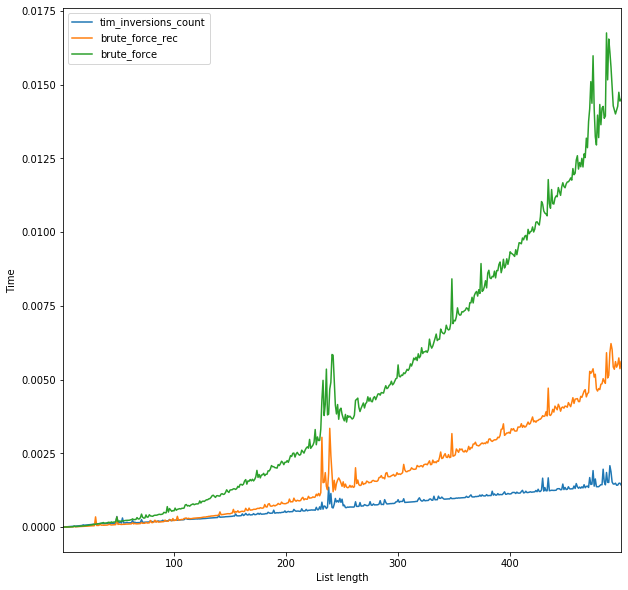

In [10]:
pl.algo_plotter(df_multi_comparison)

That is a bit weird  but the `brute_force_rec` seems to outperform the `brute force`, whereas they are both  supposed to be in **O(n2)**

`tim_inversions_count` is supposed to be in **O(nlog(n))**. 

To show the difference between the ***brute force*** approach and the ***divide to conquer*** one, namely, that of Tim, we are going to only keep :
- `tim_inversions_count`
- `brute_force_rec`

for greater values of `l_length`. In fact, we are going to forget `brute_force` because we suspect that it might overtake the maximum limit of recursion


In [11]:
tim_vs_brute = ila.CollectionAlgosInputList(tim_inversions_count, 
                                            brute_force_rec)

In [12]:
df_time_vs_brute = tim_vs_brute.time_multiple_random_lists(1000)

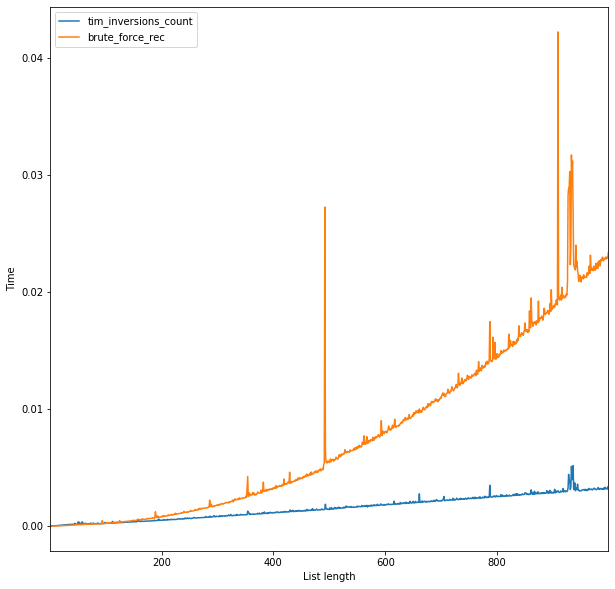

In [13]:
pl.algo_plotter(df_time_vs_brute)